Exemple extrait de [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

# Analyse en composantes principales

L'ACP est fondamentalement un algorithme de réduction de la dimensionnalité, mais il peut également être utile comme outil de visualisation, de filtrage du bruit, d'extraction de caractéristiques et bien plus encore.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets, decomposition, preprocessing, cluster

## Retour sur les iris

L'analyse en composantes principales est une méthode non supervisée, rapide et flexible de réduction de la dimensionnalité des données.

Le jeu de données iris comporte 4 dimensions et lors du dernier TP nous avons utilisé alternativement deux de ces dimensions pour visualiser les données. 

Maintenant nous allons utiliser une ACP pour déterminer les 2 premières composantes principales de ce jeu de données et ainsi le visualiser. Commençons par charger les données dans une variable *iris*.

In [19]:
# chargez le jeu de données iris
iris = sns.load_dataset('iris')
sk_iris = datasets.load_iris()

print(iris.head())
# Stocker les données en tant que DataFrame Pandas en définissant les noms de colonnes
x = pd.DataFrame(iris, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# affichez le résutat
print(x)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virgi

Refaites un pairplot en affichant cette fois-ci l'espèce de chaque données d'entrée.


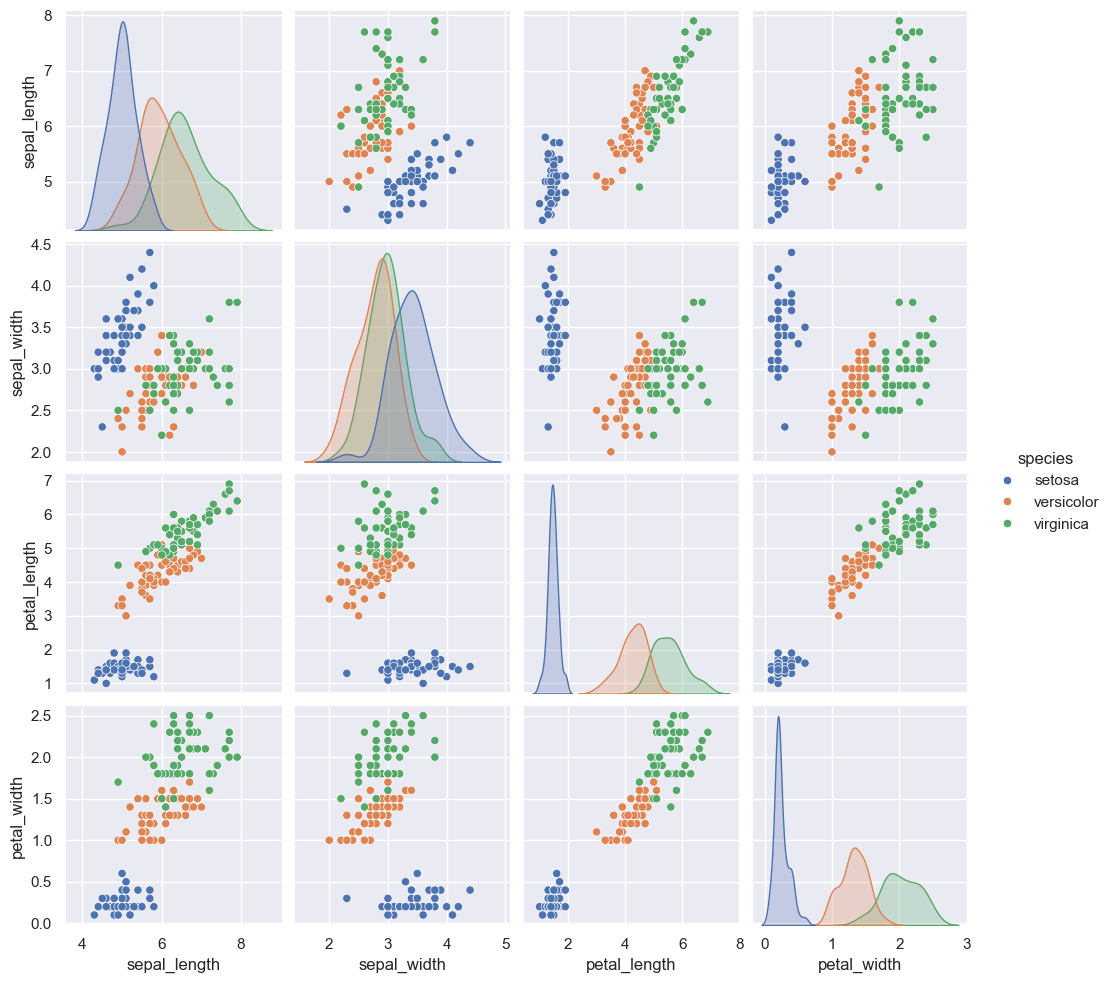

In [5]:
sns.pairplot(iris, hue='species', height=2.5)

Peut-on utiliser la variable `species` dans l'ACP ? Pourquoi ?

In [26]:
print(sk_iris.data)
print(sk_iris.target)
X_iris = pd.DataFrame(iris.drop('species', axis=1))
y_iris = iris['species']
sk_y_iris = sk_iris.target

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Utilisez une *[ACP](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)* et extrayez les coordonnées projetées sur deux premières composantes principales du jeu de données iris. Affichez les individus et colorez chaque point en fonction de son espèce.

[0.92461872 0.05306648]


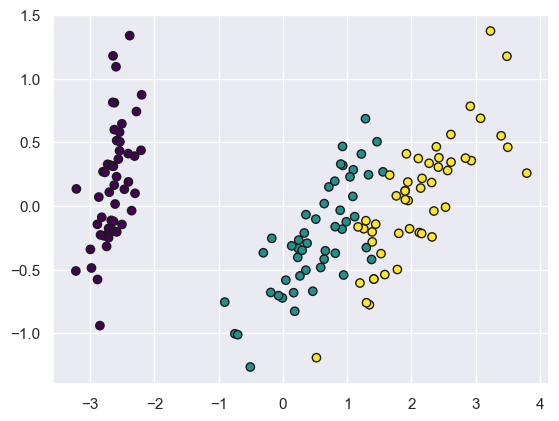

In [30]:

pca = decomposition.PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
pca.fit(X_iris)
X_pca = pca.transform(X_iris)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=sk_y_iris, cmap='viridis', edgecolor="k")

print(pca.explained_variance_ratio_)

Nous voyons que dans la représentation bidimensionnelle sur les deux premières composantes principales, les espèces sont assez bien séparées, même si l'algorithme PCA n'avait aucune connaissance des labels des espèces. Cela nous indique qu'une classification relativement simple sera probablement efficace sur cet ensemble de données, comme nous l'avons vu précédemment.

## ACP sur les données de la NBA

In [41]:
nba = pd.read_csv('data/nba.csv')
nba

,Height,Weight,Age,Salary,Team,Position,Games played,Minutes,Fields goals made,Fields goal attempted,...,Total rebond,Assits,Turnover,Steals,Blocks,Blocked fields goals attempted,Personnal fouls,Personnal fouls drawn,Points,Point differential of the score
Chris Andersen,2.08,111.1,33,341756,Miami_Heat,Center,42,14.9,1.7,2.9,...,4.1,0.4,0.6,0.4,1.0,0.3,2.1,2.1,4.9,2.3
Chris Bosh,2.11,106.1,28,17545000,Miami_Heat,Center,74,33.2,6.6,12.3,...,6.8,1.7,1.7,0.9,1.4,0.6,2.3,3.1,16.6,6.4
Dexter Pittman,2.11,139.7,24,854389,Miami_Heat,Center,4,2.9,0.8,1.3,...,1.8,0.0,0.5,0.0,0.0,0.3,1.0,0.0,1.5,-2.8
Dwyane Wade,1.93,99.8,30,17182000,Miami_Heat,Guard,69,34.6,8.2,15.8,...,5.0,5.1,2.8,1.9,0.8,0.5,2.0,4.7,21.2,8.3
James Jones,2.03,97.5,31,1500000,Miami_Heat,Forward,38,5.8,0.6,1.6,...,0.6,0.3,0.1,0.1,0.2,0.0,0.4,0.1,1.6,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patty Mills,1.83,83.9,23,1085120,San_Antonio_Spurs,Guard,58,11.3,1.9,4.2,...,0.9,1.1,0.7,0.4,0.1,0.2,0.9,0.7,5.1,0.6
Stephen Jackson,2.03,99.8,35,10059750,San_Antonio_Spurs,Forward,55,19.5,2.2,6.0,...,2.8,1.5,1.4,0.7,0.3,0.3,1.6,1.2,6.2,1.8
Tiago Splitter,2.11,111.1,27,3944000,San_Antonio_Spurs,Forward,81,24.7,3.9,7.0,...,6.4,1.6,1.2,0.8,0.8,1.0,2.0,3.1,10.3,4.7
Tim Duncan,2.11,113.4,36,9638554,San_Antonio_Spurs,Center,69,30.1,7.1,14.1,...,9.9,2.7,2.1,0.7,2.7,1.1,1.7,3.7,17.8,6.7


Représentez les distributions de quelques variables de votre choix. Représentez quelques croisements de variables et représentez une matrice de graphiques.

In [42]:
nba = nba.dropna()
nba_num = nba._get_numeric_data()

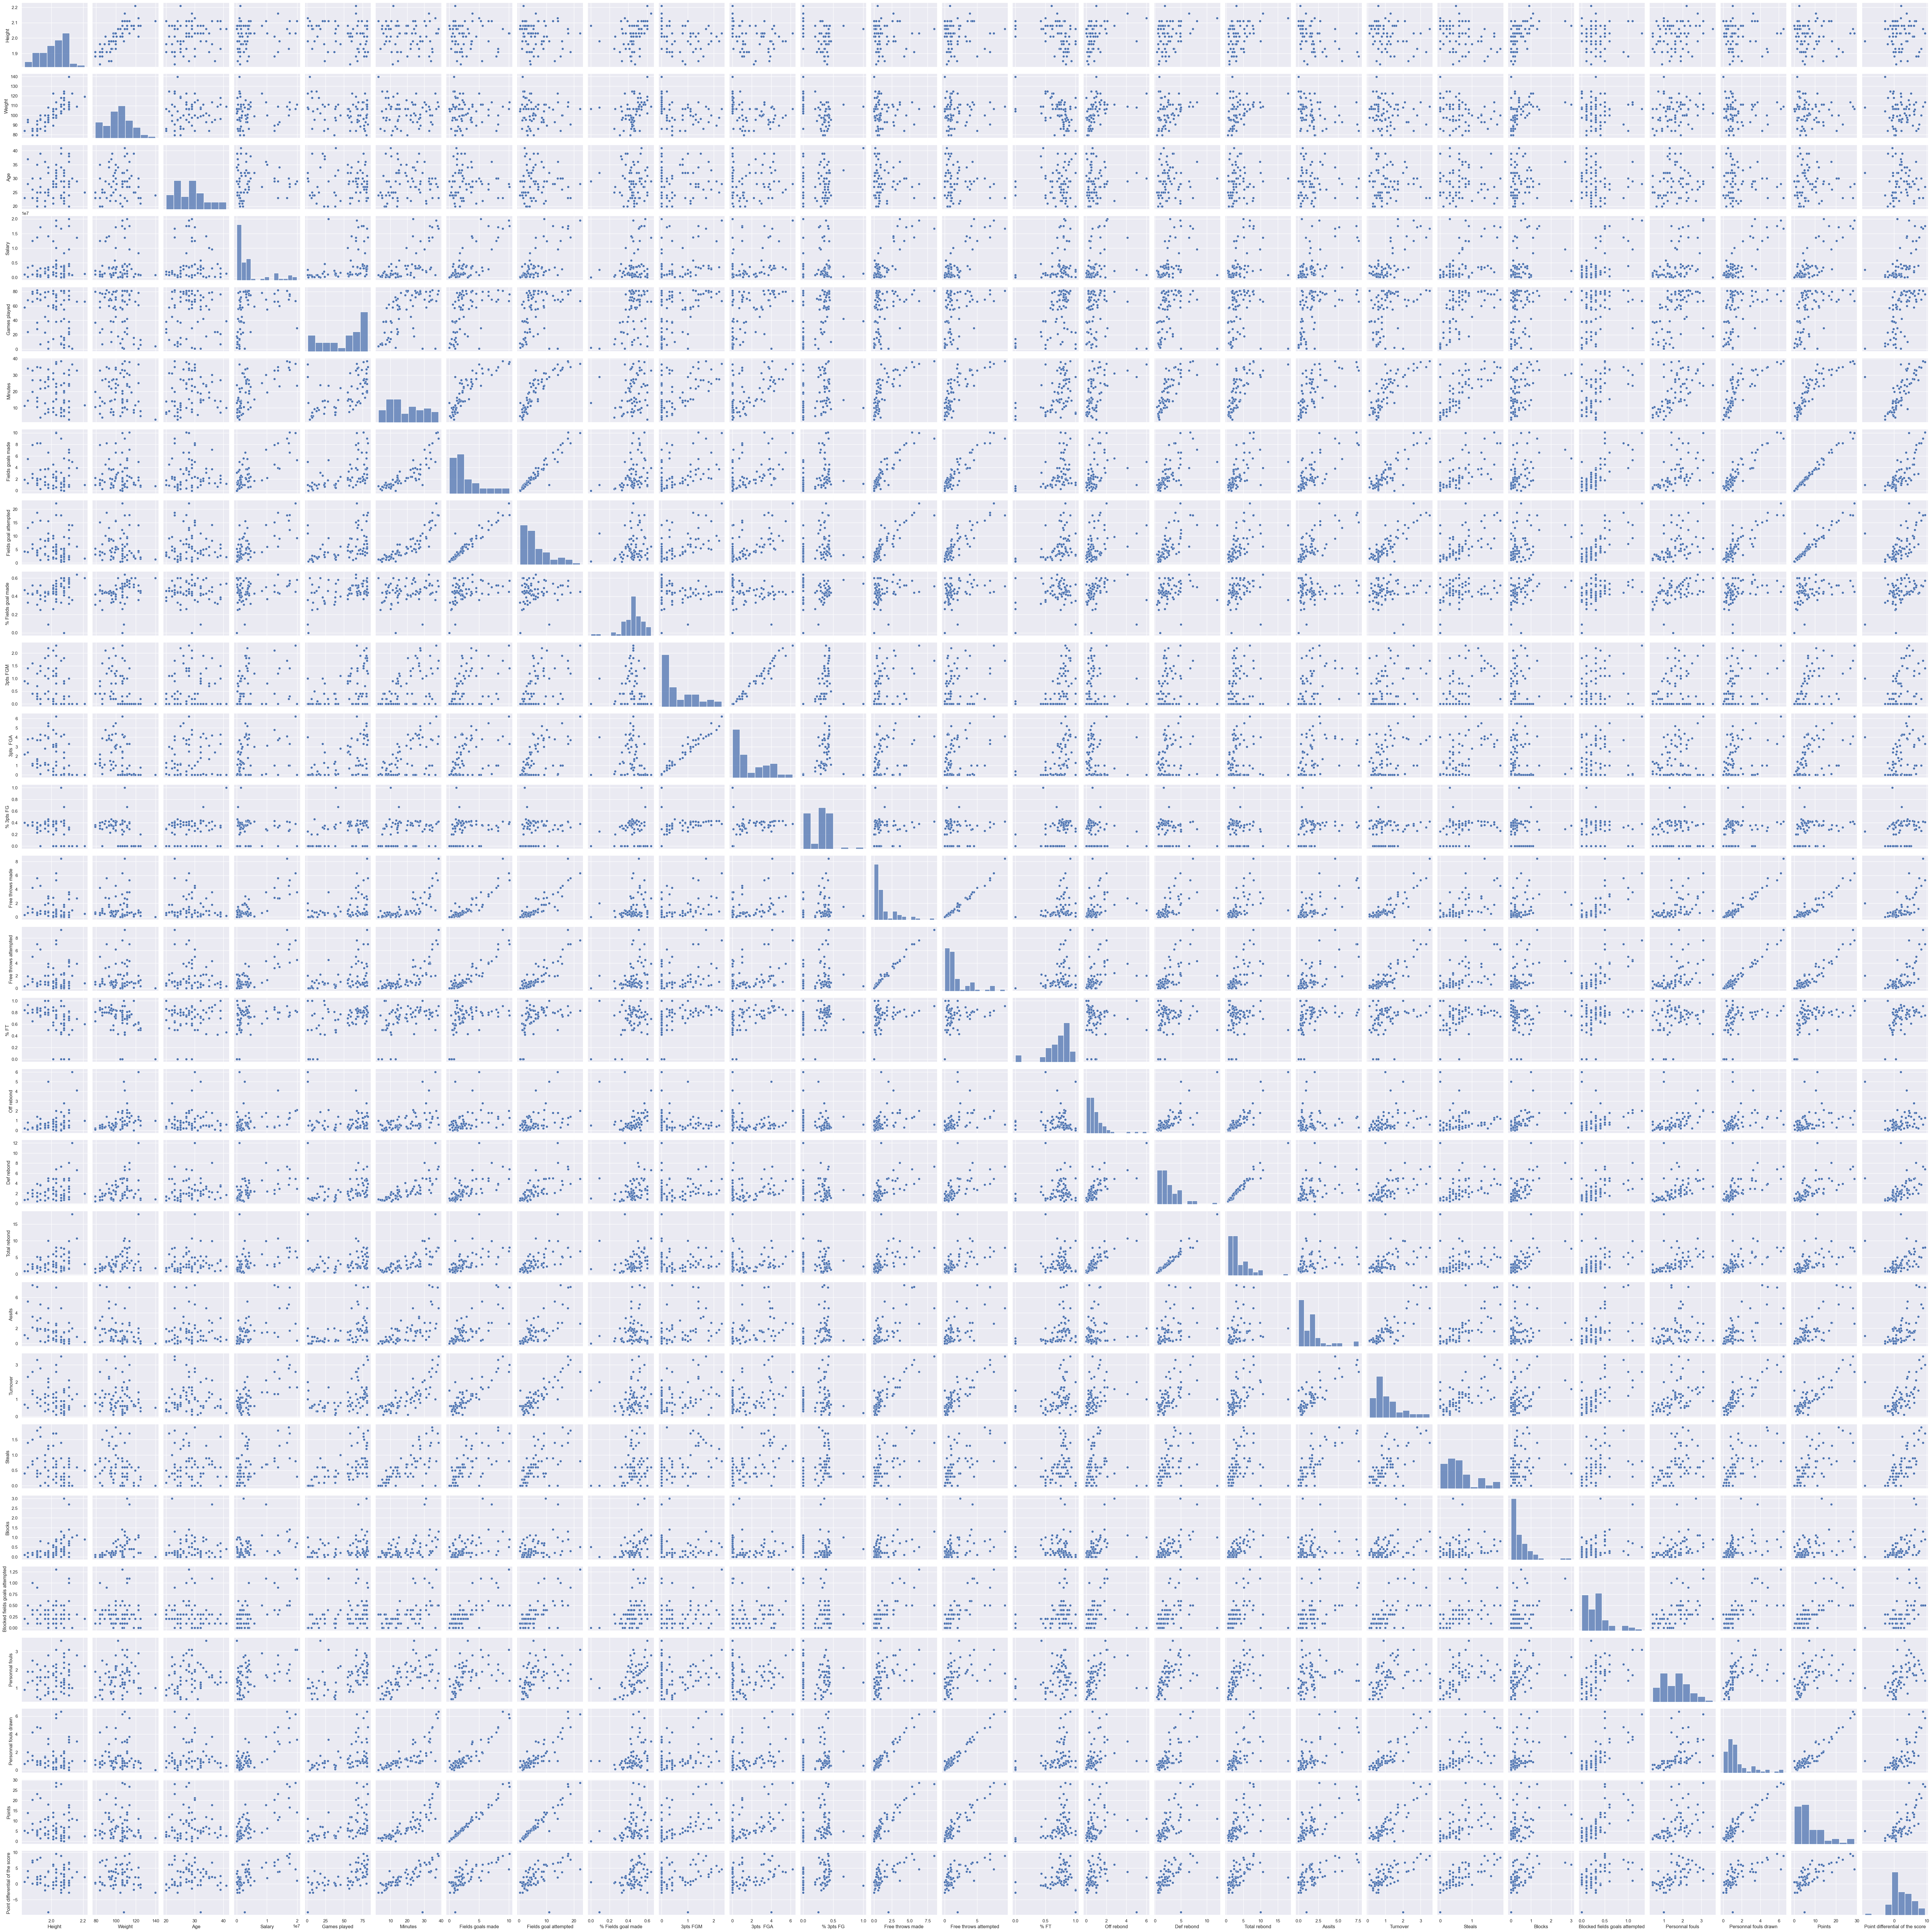

In [37]:

sns.pairplot(nba_num, height=2.5)

<Figure size 640x480 with 0 Axes>

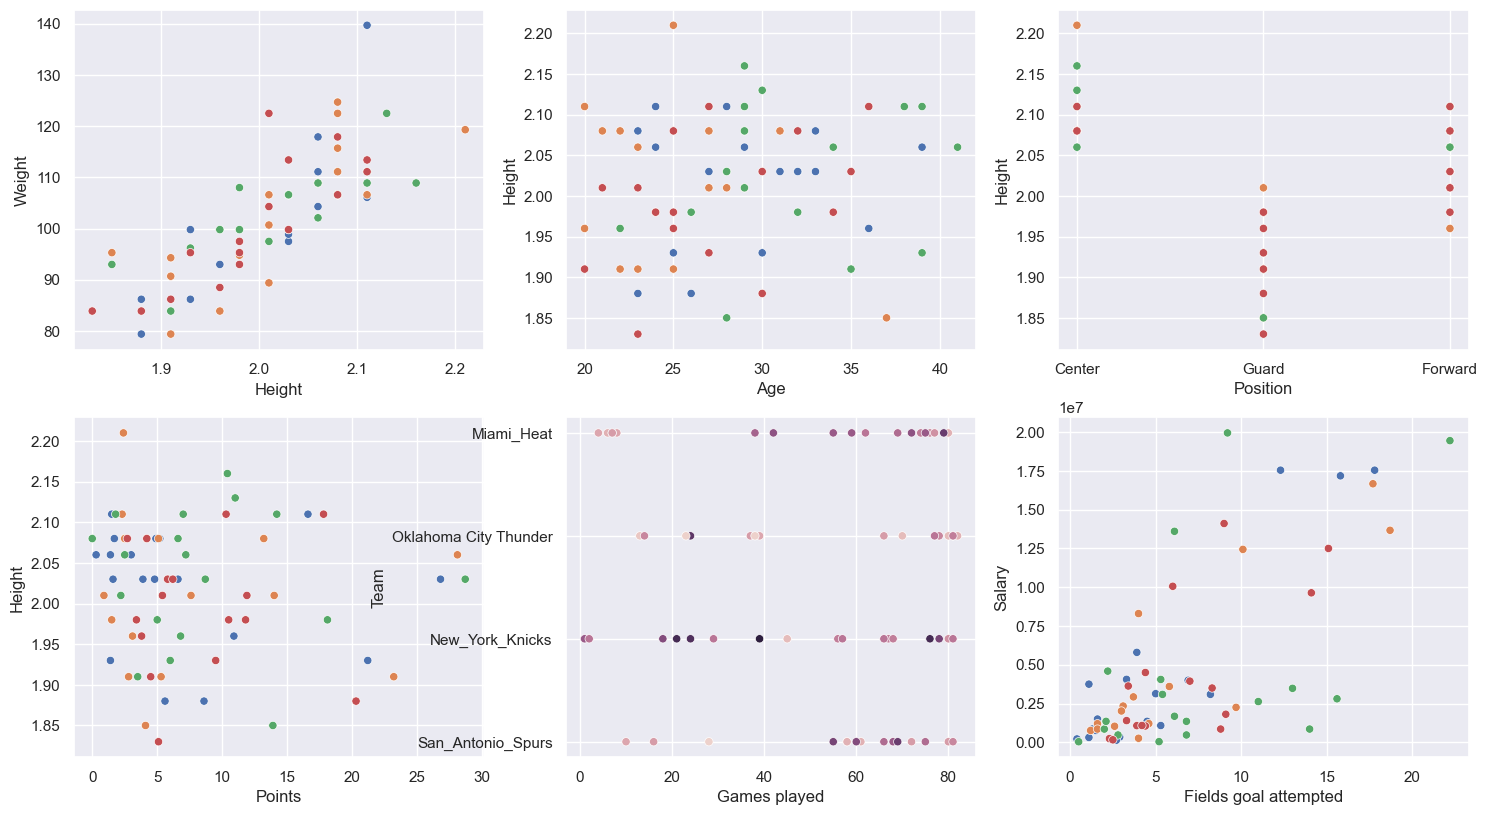

In [55]:
fig = plt.figure()
fig = plt.figure(figsize=(18, 15))
plt.subplot(3, 3, 1)
sns.scatterplot(x='Height', y='Weight', hue='Team', legend=False, data=nba)
plt.subplot(3, 3, 2)
sns.scatterplot(x='Age', y='Height', hue='Team', legend=False, data=nba)
plt.subplot(3, 3, 3)
sns.scatterplot(x='Position', y='Height', hue='Team', legend=False, data=nba)
plt.subplot(3, 3, 4)
sns.scatterplot(x='Points', y='Height', hue='Team', legend=False, data=nba)
plt.subplot(3, 3, 5)
sns.scatterplot(x='Games played', y='Team', hue='Age', legend=False, data=nba)
plt.subplot(3, 3, 6)
sns.scatterplot(x='Fields goal attempted', y='Salary', hue='Team', legend=False, data=nba)
plt.show()
# sns.scatterplot(x='Height', y='Weight', hue='Team', data=nba)

Calculs et représentez la matrice de corrélation des variables numériques. (Vous pouvez vous aider de [Plotting a diagonal correlation matrix](https://seaborn.pydata.org/examples/many_pairwise_correlations.html))

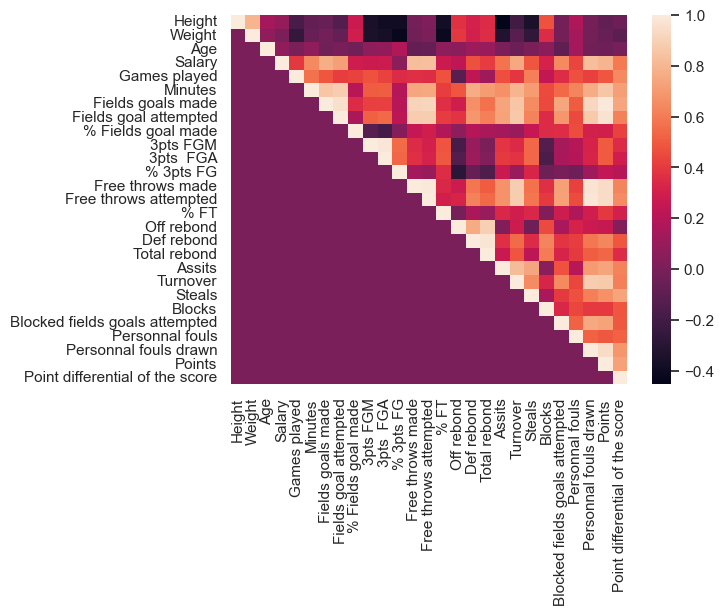

In [74]:
nba_num_labels = nba_num.columns.values.tolist()
pl = sns.heatmap(np.triu(nba_num.corr()),xticklabels=nba_num_labels,yticklabels=nba_num_labels, fmt=".2f")
plt.show()

Quelles variables seront ici nécessairement représentées comme des variables suplémentaires pour l'ACP ? Créez une matrice numpy avec les données que nous allons utiliser pour l'ACP, puis centrez et réduisez les données en utilisant *[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)*. N'oubliez pas de n'utiliser que les données numériques.

In [ ]:
# show variances
scaler = preprocessing.StandardScaler()
scaler.fit(nba_num)
nba_num_scaled = scaler.transform(nba_num)
nba_num_scaled = pd.DataFrame(nba_num_scaled, columns=nba_num_labels)
print(nba_num_scaled.var())


# PCA
pca = decomposition.PCA(n_components=2)
pca.fit(nba_num_scaled)
nba_num_scaled_pca = pca.transform(nba_num_scaled)
nba_num_scaled_pca = pd.DataFrame(nba_num_scaled_pca, columns=['PC1', 'PC2'])
print(nba_num_scaled_pca)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


Height                             1.014925
Weight                             1.014925
Age                                1.014925
Salary                             1.014925
Games played                       1.014925
Minutes                            1.014925
Fields goals made                  1.014925
Fields goal attempted              1.014925
% Fields goal made                 1.014925
3pts FGM                           1.014925
3pts  FGA                          1.014925
% 3pts FG                          1.014925
Free throws made                   1.014925
Free throws attempted              1.014925
% FT                               1.014925
Off rebond                         1.014925
Def rebond                         1.014925
Total rebond                       1.014925
Assits                             1.014925
Turnover                           1.014925
Steals                             1.014925
Blocks                             1.014925
Blocked fields goals attempted  

Affichez et commentez la diminution de la variance expliquée par chaque composante. Superposez la variance expliquée cumulée.

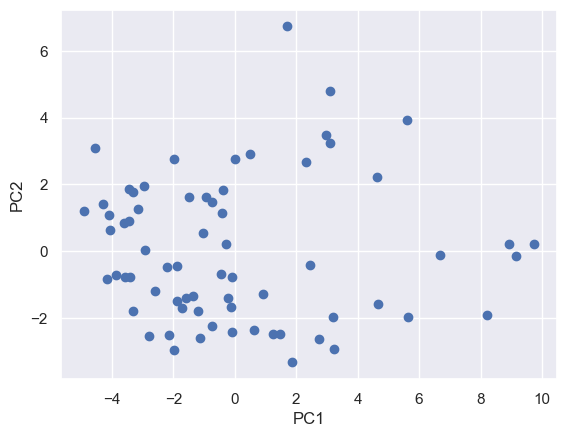

In [78]:
plt.scatter(nba_num_scaled_pca['PC1'], nba_num_scaled_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Quelle quantité de variance est expliquée par les 2 premières variables ? Combien faudrait-il choisir de variables pour garder 90% de variance expliquée ?

Affichez les contributions des variables aux axes principaux (1 et 2) avec un bar plot en utilisant l'attribut `components_` de `PCA`. Interprétez la signication des deux axes.

In [ ]:
def scree_plot(component, feature_names):
    # sort features by decreasing contribution
    component = np.abs(component)
    component, feature_names = zip(*sorted(zip(component, feature_names), key=lambda x: x[0], reverse=True))
    ticks = np.arange(len(component))
    plt.bar(ticks, component)
    plt.xticks(ticks=ticks, labels=feature_names, rotation='vertical')
    plt.ylabel("Valeur absolue de la contribution à l'axe")
    plt.show()

> Remarque : vous devriez vous rendre compte que l'axe 1 correspond à la performance en jeu du joueur, tandis que l'axe 2 correspond (en partie) à ses caractéristiques physiques

Pour la suite nous allons travailler dans le premier plan factoriel. Calculez l'ACP avec seulement 2 composantes.

Représentez le nuage des individus projeté dans le premier plan factoriel, en coloriant selon l'équipe d'appartenance. Affichez les ellipses de concentration avec la fonction `plot_ellipses`, puis commentez.

In [ ]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, color, n_std=1.96, **kwargs):
    """
    From https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
        For a normal distribution, 1 std=68% of values, 1.96 std=95% of values, 2.58 std = 99% of values

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=color, edgecolor=color, alpha=0.3, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


def get_colors(labels, cmap_name):
    """Return a mapping {label: color}, that can be used for the arguments
        - `palette` in a seaborn function
        - `colors` in the function `plot_ellipses`
        
    Args:
        - labels: a list-like containing the different labels that need to be attributed a color (not necessarily unique)
        - cmap_name: the name of a matplotlib colormap, e.g. 'Spectral'. See https://matplotlib.org/stable/tutorials/colors/colormaps.html
    
    Example:
        sns.scatterplot(x=..., y=..., hue=labels, palette=get_colors(labels, 'Spectral'))
    """
    labels_u = np.unique(labels)
    cmap = plt.get_cmap(plt.colormaps[cmap_name],len(labels_u))
    return {l: cmap(i) for i, l in enumerate(labels_u)}


def plot_ellipses(x, y, labels, ax, colors, n_std=1.96):
    """Plot confidence ellipses, one for each label"""
    labels_u = np.unique(labels)
    for label in labels_u:
        xl = x[labels==label]
        yl = y[labels==label]
        confidence_ellipse(xl, yl, ax, colors[label], n_std=n_std)

> Remarque : La variable Team n'est pas très discriminante

Même chose avec la position du joueur sur le terrain.

> Remarque : L'axe 1 ne discrimine pas vraiment, mais l'axe 2 oui. C'est logique car celui-ci représente la morphologie, qui a souvent un impact sur la position sur le terrain.

Créez un nouveau joueur de NBA en lui donnant les caractéristiques de votre choix. Projetez le dans le premier axe factoriel et représentez le parmi les autres individus

## Implémentation de l'ACP

Proposez une implémentation de l'ACP en utilisation la fonction [svd](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) de `scipy.linalg`. Votre fonction renverra au minimum la variance expliquée par chaque axe factoriel ainsi que les coordonnées des individus et des variables sur les axes factoriels.



Appliquez votre fonction au jeu de données de la NBA, affichez les individus dans le premier plan factoriel et comparez vos résultats à ceux obtenus avec la fonction `PCA` de scikit-learn.

Affichez ensuite les variables dans le premier plan factoriel avec des flèches, comme dans l'exemple ci-dessous ([source](https://cran.r-project.org/web/packages/factoextra/readme/README.html)). Vous pourrez utiliser la fonction [annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) de matplotlib pour tracer les flèches.

![](https://cran.r-project.org/web/packages/factoextra/readme/tools/README-pca-variables-1.png)

In [ ]:
# Exemple d'utilisation de la fonction `annotate`
fig, ax = plt.subplots()
ax.annotate('test', (0, 0), (1, 1), arrowprops=dict(arrowstyle='<-', color='black'))
plt.show()

In [ ]:
# Code à compléter pour afficher le cercle des corrélations

# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# ici il vous faut compléter le code pour obtenir le cercle des corrélations

plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

## Utilisation de l'ACP pour visualiser un clustering

Retour sur le clustering vu au TP précédent. Chargez le jeu de données `zoo`, effectuez une ACP et affichez les individus dans le premier plan factoriel. Colorez les individus en fonction de leur espèce et affichez les ellipses de concentration. Quelle est la quantité de variance expliquée par ces deux premeirs axes ?

In [ ]:
zoo = pd.read_csv('../tp2/data/zoo.csv', skiprows=[1,2])
zoo

Effectuez un clustering kmeans sur ce même jeu de données avec le nombre de clusters de votre choix, puis affichez les individus sur le premier plan factoriel en colorant en fonction du cluster auquel ils appartiennent.

## Utilisation de l'ACP pour la visualisation de données

L'utilité de la réduction de dimension n'est peut-être pas tout à fait apparente en deux dimensions seulement, mais elle devient beaucoup plus claire lorsqu'on examine des données en grande dimension.

Pour s'en convaincre, examinons rapidement l'application de l'ACP à des images de chiffres manuscrits.

### Hand-written digits

Chargement des données [*load_digit*](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) :

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

Les données sont des images en niveaux de gris de taille 8x8 pixels (donc 64 dimensions)
Pour avoir une idée des relations entre ces points, nous pouvons utiliser l'ACP pour les projeter dans un nombre de dimensions plus facile à gérer, par exemple deux :

Quelle est la variance expliquée par les deux premières composantes ?

Affichez les individus dans le premier plan factoriel, et affichez le chiffre représenté par chaque image (via `digits.target`)

Attention, la variance expliquée par ces deux variables n'est pas énorme, il ne faut pas croire qu'on visualise l'entiereté du jeu de données en 2D.

### Choix du nombre de composantes

Une partie essentielle de l'utilisation de l'ACP en pratique est la capacité à estimer le nombre de composantes nécessaires pour bien décrire les données.
Cela peut être déterminé en examinant le cumul de variance expliquée en fonction du nombre de composantes. Affichez ce cumul pour le jeu de données digits.

Quel pourcentage de variance est expliqué par les 10 premières composantes ? Combien faudrait-il de composantes pour expliquer 99% de la variance ?

## Utilisation de l'ACP pour filtrer du bruit

L'ACP peut également être utilisée comme une approche de filtrage de données bruitées.
L'idée est la suivante : toutes les composantes dont la variance est beaucoup plus grande que l'effet du bruit devraient être relativement peu affectées par le bruit. Ainsi, si on reconstruit les données en utilisant uniquement le plus grand sous-ensemble de composantes principales, on devrait réussir à garder le signal et éliminer le bruit.

Voyons comment cela se présente avec les données précédentes.
Tout d'abord, affichons quelques exemples de données **non** bruitées :

In [ ]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Maintenant, ajoutez du bruit à ces données (avec une loi normale centrée et d'écart type 4). Affichez les données bruitées.

Calculez une ACP en choisissant le nombre de composantes tel qu'environ 50% de la variance soit expliquée :

Utilisez l'ACP pour reconstruire les données non bruitées en utilisant une réduction de dimension via [*transform*](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) et une transformation inverse via [*inverse_transform*](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform) . Affichez le résultat et commentez.

Cette propriété de préservation du signal et de filtrage du bruit fait de l'ACP une méthode de sélection des caractéristiques très utile. Par exemple, plutôt que d'entrainer un classifieur sur des données à très haute dimension, nous pouvons l'entrainer sur une représentation avec moins de dimensions, qui servira automatiquement à filtrer le bruit aléatoire des entrées.

## Exemple: Eigenfaces

On peut aussi utiliser l'ACP pour réduire le nombre de dimensions d'une image. Chaque image est décrite par un vecteur de faible dimension qui peut être utilisé pour faire des recherches dans une base de données par exemple.

Nous allons utiliser le jeu de données "Labeled Faces in the Wild" :

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

Quelle est la dimension du jeu de données (nombre d'individues et de features) ?

Affichez quelques images du jeu de données via la fonction [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib, avec par exemple la colormap `bone` ou `binary_r` :

Utilisez l'ACP pour réduire le nomnbre de features à 150. 

Quel est le pourcentage de variance expliqué par ces 150 composantes ?

Affichez les 30 premières composantes principales sur une grille (sous forme d'images). Ces composantes sont des vecteurs propres (*eigenvectors* en anglais), d'où le terme *eigenfaces* pour ce cas particulier. 

Commentez ces images.

Pour quelques images du jeu de données, affichez l'image originale et l'image reconstruite grâce à l'ACP à 150 composantes. Que pouvez-vous dire que la qualité de la reconstruction ?